In [86]:
from IPython.core.display import HTML
css = open('style_table.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
from IPython.display import IFrame

## Statsmodels

In [37]:
import statsmodels.api as sm

_ = sm.datasets.get_rdataset("Guerry", "HistData", cache=".cache")
_ = sm.datasets.get_rdataset("Duncan", "car", cache=".cache")
_ = sm.datasets.get_rdataset("Arthritis", "vcd", cache=".cache")

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import patsy
import seaborn as sns
sns.set(color_codes=True)

In [ ]:
%matplotlib inline

In [39]:
pd.set_option('mode.chained_assignment', None)

In [40]:
dta = sm.datasets.get_rdataset("Guerry", "HistData", cache=".cache")                               

In [41]:
dta.data.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [42]:
dta?

In [43]:
dta.data?

In [66]:
mydata = dta.data

In [67]:
mydata['log_pop1831'] = mydata['Pop1831'].apply(np.log)

In [68]:
#model = sm.formula.ols("Lottery ~ Literacy + np.log(Pop1831)", data=dta.data)
model = sm.formula.ols("Lottery ~ Literacy + log_pop1831", data=mydata)

In [69]:
results = model.fit()

In [70]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sat, 02 Apr 2016   Prob (F-statistic):           1.90e-08
Time:                        07:40:40   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     246.4341     35.233      6.995      

In [1]:
results.summary()

NameError: name 'results' is not defined

In [71]:
results.params

Intercept      246.434135
Literacy        -0.488923
log_pop1831    -31.311392
dtype: float64

In [72]:
results.tvalues

Intercept      6.994511
Literacy      -3.832038
log_pop1831   -5.238842
dtype: float64

In [73]:
results.pvalues

Intercept      6.260771e-10
Literacy       2.462102e-04
log_pop1831    1.202925e-06
dtype: float64

In [74]:
type(results.params)

pandas.core.series.Series

In [54]:
dta.data.Literacy.min()

12

In [78]:
Y, X = patsy.dmatrices("Lottery ~ Literacy + log_pop1831", mydata, return_type='dataframe')
results.predict(X)

array([ 45.28111552,  26.10731517,  61.66689491,  65.84571262,
        60.50666251,  50.65364442,  36.18545491,  64.36053682,
        45.16226913,  54.50128015,  47.05726094,  43.59906372,
        26.75575698,  57.33509109,  44.31149942,  36.4093396 ,
        66.44356669,  62.5179869 ,  31.445032  ,  38.37361199,
        60.4349197 ,  44.14479871,  35.96987559,  47.35193753,
        32.05500621,  43.73139604,  43.02036876,  42.80379617,
        41.5681693 ,  48.01756606,  29.0649797 ,  41.34530592,
        36.80711795,  65.8333425 ,  54.95241358,  34.66823101,
        30.8711604 ,  56.14387953,  62.18620796,  45.34919918,
        58.41110071,  42.04335068,  46.75969329,  57.84147286,
        48.13693343,  78.42531729,  42.68049242,  25.57205184,
        33.38962699,  38.36831808,  53.49369591,  24.39057162,
        30.17352354,  49.46837681,  29.66117011,  59.94201695,
         8.45773319,  32.60937127,  33.71368948,  19.4234143 ,
        38.28350577,  33.70590127,  49.83755855,  72.94

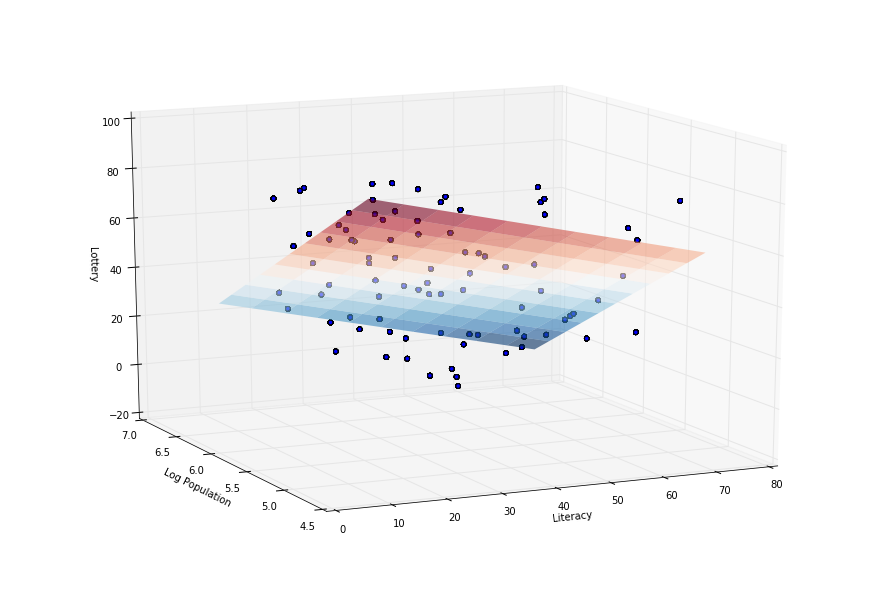

In [84]:
from mpl_toolkits.mplot3d import Axes3D

## Create the 3d plot -- skip reading this
# Literacy and Population grid for 3d plot
literacy_min = mydata.Literacy.min()
literacy_max = mydata.Literacy.max()
pop_min = mydata.log_pop1831.min()
pop_max = mydata.log_pop1831.max()

xx1, xx2 = np.meshgrid(np.linspace(literacy_min, literacy_max, 100), 
                       np.linspace(pop_min, pop_max, 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = results.params[0] + results.params[1] * xx1 + results.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
Y, X = patsy.dmatrices("Lottery ~ Literacy + log_pop1831", mydata, return_type='dataframe')
resid = Y.as_matrix() - results.predict(X)
ax.scatter(X[resid >= 0].Literacy, X[resid >= 0].log_pop1831, Y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].Literacy, X[resid < 0].log_pop1831, Y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('Literacy')
ax.set_ylabel('Log Population')
ax.set_zlabel('Lottery')

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
X = df_adv[['TV', 'Radio']]
y = df_adv['Sales']
df_adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


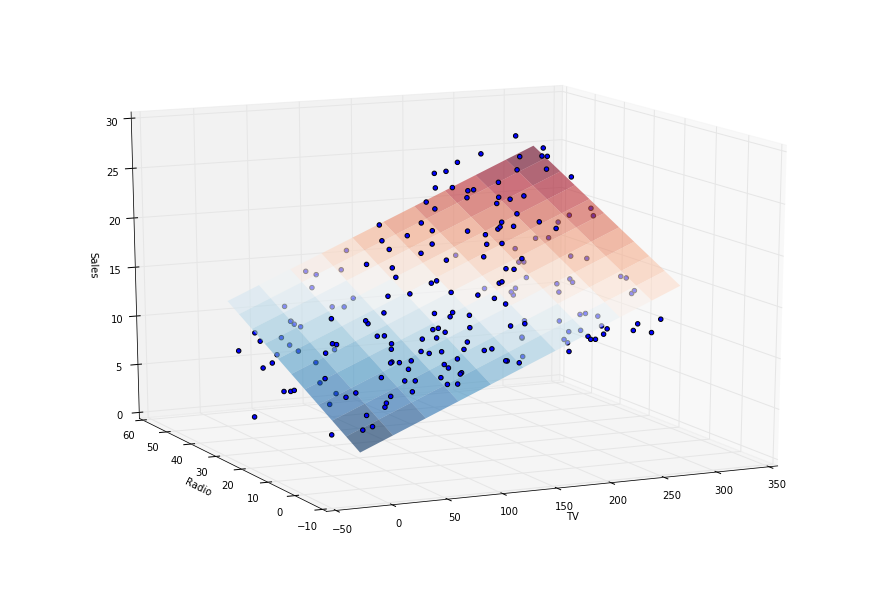

In [83]:
from mpl_toolkits.mplot3d import Axes3D

X = df_adv[['TV', 'Radio']]
y = df_adv['Sales']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                       np.linspace(X.Radio.min(), X.Radio.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].TV, X[resid >= 0].Radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].Radio, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

In [ ]:
dta = sm.datasets.get_rdataset("Arthritis", "vcd", cache=".cache")

In [ ]:
dta.data.Improved.value_counts()

In [ ]:
df = dta.data

In [ ]:
df['B_Improved'] = df['Improved'].map({'Some': True,
                                       'Marked': True,
                                       'None': False
                                      })

In [ ]:
df.head()

In [ ]:
X = patsy.dmatrix("Treatment + Sex + Age", data=df, return_type='dataframe')
Y = df.B_Improved

In [ ]:
logit_model = sm.Logit(Y, X)

In [ ]:
results = logit_model.fit()

In [ ]:
results.summary()

In [ ]:
results.get_margeff().summary()

In [ ]:
Y = df.Improved

In [ ]:
mlogit_model = sm.MNLogit(Y, X)

In [ ]:
results = mlogit_model.fit()

In [ ]:
results.summary()

In [ ]:
results.get_margeff().summary()

    . logit B_Improved treat sex Age
    
    Iteration 0:   log likelihood = -58.224363  
    Iteration 1:   log likelihood = -46.120282  
    Iteration 2:   log likelihood = -46.031647  
    Iteration 3:   log likelihood = -46.031402  
    Iteration 4:   log likelihood = -46.031402  
    
    Logistic regression                               Number of obs   =         84
                                                      LR chi2(3)      =      24.39
                                                      Prob > chi2     =     0.0000
    Log likelihood = -46.031402                       Pseudo R2       =     0.2094
    
    ------------------------------------------------------------------------------
      B_Improved |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
    -------------+----------------------------------------------------------------
           treat |   1.759804   .5364955     3.28   0.001     .7082924    2.811316
             sex |  -1.487831   .5947694    -2.50   0.012    -2.653558   -.3221046
             Age |   .0487465   .0206629     2.36   0.018     .0082479    .0892452
           _cons |  -3.287434   1.449412    -2.27   0.023     -6.12823    -.446638
    ------------------------------------------------------------------------------


    . margins, dydx(*)
    
    Average marginal effects                          Number of obs   =         84
    Model VCE    : OIM
    
    Expression   : Pr(B_Improved), predict()
    dy/dx w.r.t. : treat sex Age
    
    ------------------------------------------------------------------------------
                 |            Delta-method
                 |      dy/dx   Std. Err.      z    P>|z|     [95% Conf. Interval]
    -------------+----------------------------------------------------------------
           treat |   .3238183   .0735499     4.40   0.000     .1796631    .4679735
             sex |   -.273773   .0951228    -2.88   0.004    -.4602103   -.0873358
             Age |   .0089698    .003336     2.69   0.007     .0024312    .0155083
    ------------------------------------------------------------------------------


    . mlogit improve treat sex Age

    Iteration 0:   log likelihood = -84.957958  
    Iteration 1:   log likelihood = -71.577377  
    Iteration 2:   log likelihood = -71.418045  
    Iteration 3:   log likelihood = -71.417555  
    Iteration 4:   log likelihood = -71.417555  

    Multinomial logistic regression                   Number of obs   =         84
                                                      LR chi2(6)      =      27.08
                                                      Prob > chi2     =     0.0001
    Log likelihood = -71.417555                       Pseudo R2       =     0.1594

    ------------------------------------------------------------------------------
         improve |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
    -------------+----------------------------------------------------------------
    Marked       |
           treat |   2.144733   .6086598     3.52   0.000     .9517818    3.337684
             sex |  -1.390033   .6563779    -2.12   0.034     -2.67651   -.1035561
             Age |    .047497   .0231275     2.05   0.040     .0021678    .0928261
           _cons |  -4.401247   1.678671    -2.62   0.009    -7.691383   -1.111111
    -------------+----------------------------------------------------------------
    None         |  (base outcome)
    -------------+----------------------------------------------------------------
    Some         |
           treat |    1.07607   .6902589     1.56   0.119    -.2768126    2.428953
             sex |  -1.692597   .8710234    -1.94   0.052    -3.399771    .0145777
             Age |   .0510761   .0288193     1.77   0.076    -.0054088     .107561
           _cons |  -3.199487   2.012402    -1.59   0.112    -7.143722    .7447486
    ------------------------------------------------------------------------------


    . margins, dydx(*)

    Average marginal effects                          Number of obs   =         84
    Model VCE    : OIM

    Expression   : Pr(improve==Marked), predict()
    dy/dx w.r.t. : treat sex Age

    ------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   Std. Err.      z    P>|z|     [95% Conf. Interval]
    -------------+----------------------------------------------------------------
       treat |   .3151456   .0731874     4.31   0.000     .1717009    .4585903
         sex |  -.1406108   .1058278    -1.33   0.184    -.3480295    .0668079
         Age |   .0052369   .0037041     1.41   0.157    -.0020229    .0124967
    ------------------------------------------------------------------------------


In [ ]:
sns.distplot(df['Age'])

In [ ]:
df['age_cat'] = pd.cut(df['Age'], 4)
df['age_cat'].value_counts()

In [ ]:
X = patsy.dmatrix("Treatment + Sex + age_cat", data=df, return_type='dataframe')
Y = df.B_Improved

In [ ]:
logit_model = sm.Logit(Y, X)

In [ ]:
results = logit_mod.fit()

In [ ]:
results.summary()

In [ ]:
results.get_margeff().summary()